# Régression linéaire par moindres carrés

Les imports du notebook complet :

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=9a1440039dbf6283ad33f9b49d913431391c5909ddbd46ee0a91ef5dadff726f
  Stored in directory: c:\users\mini\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [2]:
%matplotlib notebook
import random
from sklearn import neighbors
from sklearn.datasets import load_iris  # les donn ́ees iris sont charg ́ees
from sklearn.datasets import load_boston  # les donn ́ees iris sont charg ́ees
from sklearn.datasets import load_diabetes  # les donn ́ees iris sont charg ́ees
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import pylab as pl  # permet de remplacer le nom "pylab" par "pl"
import numpy as np
import statistics as stat

Soit l'algorithme de régression linéaire par moindre carrés suivant : <br>
1) Ajouter le vecteur 1 à la matrice $X \in \mathbb{R}^{n x d}$ contenant les données $x_{i=1}^{n}$<br>
2) Calculer $w = (X^{T}X)^{-1}X^{T}y$, avec $y = y_{i=1}^{n} \in \mathbb{R}^{n}$<br>
3) Retourner $w$<br>
On se propose de coder l'implémentation de la régression linéaire par moindre carrés :

In [3]:
def reg(X, Y):
    ones = np.ones((len(X), 1))
    Xb = np.concatenate((X, ones), axis=1)
    
    Xt = np.transpose(Xb)
    w = np.dot(np.dot(np.linalg.inv(np.dot(Xt, Xb)), Xt), Y)
    
    print(w)
    return w

Pour la réalisation de l'exercice nous utiliserons un jeu de données bi-dimensionnelle contenues dans un fichier.<br>
On ouvre le fichier et on stocke les valeurs dans 2 variables ($x$ et $y$) que nous réutiliserons par la suite.<br>
La variable $x$ est un vecteur en 2 dimensions, la variable $y$ est en 1 dimension.

In [4]:
# Lire le fichier
tt = np.loadtxt("dataRegLin2D.txt")
x = tt[:, :2]
y = tt[:, -1]

On représente les données sur un graphe en 3 dimensions :

<IPython.core.display.Javascript object>


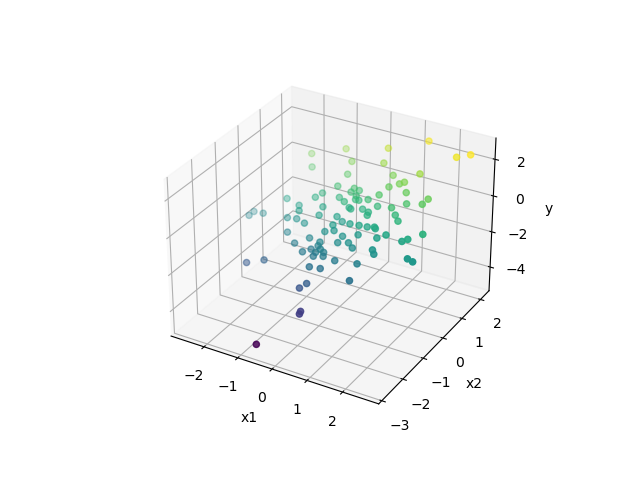

In [5]:
def graph3D(x,y):
    fig = pl.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:,0],x[:,1],y, c=y)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    pl.show()

# Graphe 3D
graph3D(x,y)

A première vue il y a une dépendance linéaire entre les étiquettes $x_{i}^{1}$, $x_{i}^{2}$ et $y_i$ selon l'angle de vue.

On va donc chercher si les valeurs sont bien dépendantes ou non. Pour cela on affiche les résultats de la régression linéaire des valeurs du fichier sur un graphe en 2D.<br>
En premier lieu on étudie les dépendances entre les étiquettes $x_{i}^{1}$ et $y_i$ (en <span style="color:red">rouge</span>) puis les étiquettes $x_{i}^{2}$ et $y_i$ (en <span style="color:blue">bleu</span>).

<IPython.core.display.Javascript object>


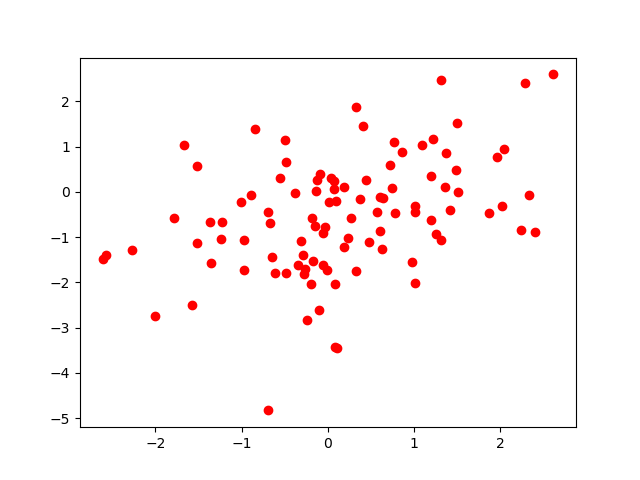

<IPython.core.display.Javascript object>


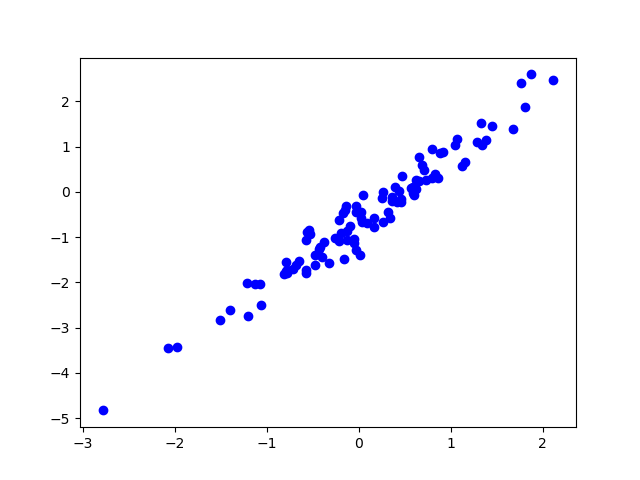

In [6]:
# Première étiquette
pl.figure("x^(1)")
pl.scatter(x[:, 0], y, c='red')
pl.show()

# Seconde étiquette
pl.figure("x^(2)")
pl.scatter(x[:, 1], y, c='blue')
pl.show()

On peut voir que les données de la <span style="color:red">première dimension</span> de x (i.e $x_{i}^{1}$) est "mal" répartie et produit une dispersion de points qui ne semblent pas avoir de cohérences entre eux.<br>
L'inverse se produit pour les données de la <span style="color:blue">seconde dimension</span> de x (i.e $x_{i}^{2}$) qui ont l'air d'être facilement approchées par une droite de régression.

On cherche maintenant à calculer les droites de régression dans chacun des cas :

[ 0.44979209 -0.59832595]
[ 1.43100678 -0.64475543]


<IPython.core.display.Javascript object>


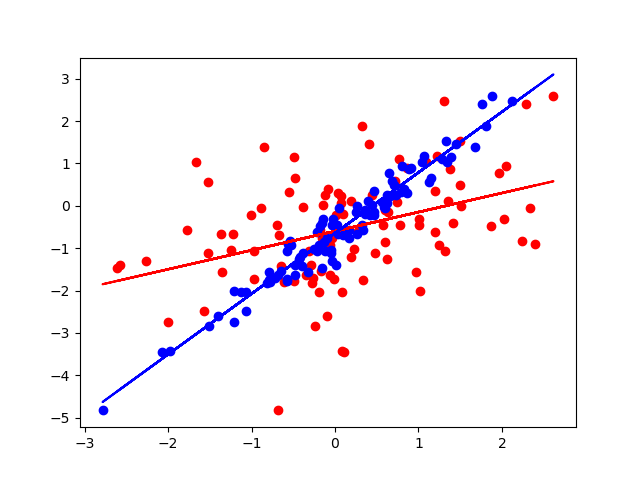

In [7]:
# Paramètres de régression
x0p = reg(x[:, [0]], y)  # [ 0.44979209 -0.59832595]
x1p = reg(x[:, [1]], y)  # [ 1.43100678 -0.64475543]
    
def lin(x, xp):
    return xp[0] * x + xp[1]
    
# Graphiques 2D
pl.figure("Plotting des valeurs de x et leur droites de régression calculées")
pl.scatter(x[:, 0], y, c='red')
pl.scatter(x[:, 1], y, c='blue')
pl.plot(x, lin(x, x0p), color='red')
pl.plot(x, lin(x, x1p), color='blue')
pl.show()

On peut remarquer que les points <span style="color:red">rouge</span> de $x_{i}^{1}$ et $y_{i}$ sont dispersés et la droite de régression qui les représente passe grossièrement au milieu de tous les points, mais la cohérence des points entre eux est faible.<br>
En revanche les points <span style="color:blue">bleus</span> sont bien alignés et la droite de régression qui en résulte est  proche des points.

On va calculer un vecteur de pondération <i>w</i> afin de réaliser une fonction qui à partir de valeurs $x_{test}$ permet de prédire le label $y_{test}$ :

In [8]:
# Calcul du vecteur de pondération w
w = reg(x,y)

[ 0.2451943   1.37054629 -0.67806079]


On donne la formule de la fonction de la droite de régression, soit $x \in \mathbb{R}^{2}, f(x) =  w_{1}.x_{1} + w_{2}.x_{2} + w_{3}$

In [9]:
def pred_reg(x, w):
    return w[0]*x[0] + w[1]*x[1] +  w[2]

In [10]:
# Calcul de l'erreur au carré entre les valeurs prédites et celles de l'ensemble des données réelles
err_pred = []
for i in range(len(x)):
    # Calcul de la valeur prédite
    y_pred = pred_reg(x[i], w)
    # Différence entre le label prédit et le label réel
    err_pred.append(abs(y[i] - y_pred)**2)
print(err_pred[:10], "...")

[0.0011011440609482945, 0.00027155656040194235, 0.005496287176338418, 0.008653831842952648, 0.002268979128658865, 0.00011454213836434125, 9.14356493596462e-06, 0.0043390138732753, 0.06650475806117039, 0.0006566447815647043] ...


In [11]:
# Moyenne d'erreur carrée
stat.mean(err_pred)

0.010247981453700131

On trouve une prédiction proche à 2 décimales en moyenne des valeurs d'origines grâce à la fonction de prédiction entraînée par la méthode des moindres carrés.

# Régression linéaire avec Scikit-learn

Nous avons jusque là réalisé la méthode "à la main" en suivant l'algorithme de régression linéaire des moindres carrés.<br>
Maintenant nous allons réaliser implémenter et analyser de nouveaux algorithmes de régressions linéaires avec la librairie Scikit-learn.<br>

Pour commencer on va recalculer avec les nouveaux outils les données de l'exercice précédent.

In [12]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9937458761154908
intercept: -0.6780607876728961
slope: [0.2451943  1.37054629]


Pour rappel nous avions trouvé comme paramètres :

In [13]:
w

array([ 0.2451943 ,  1.37054629, -0.67806079])

In [14]:
# Prédictions des labels y
y_pred = model.predict(x)
print(y_pred[:10], "...")

[-1.52505651  1.87262103  0.18835095 -2.12250597 -1.3845962  -0.06978014
 -1.62429383 -1.13684119 -0.92789616 -1.05197492] ...


In [15]:
# Formatage des données
pred = np.array(y_pred).reshape(-1, 1)

# Calcul de l'erreur moyenne carré pour chaque valeurs
print(mean_squared_error(y, y_pred))

0.010247981453700133


La prédiction calculée par scikit-learn est identique à celle trouvée précédemment.

On peut appliquer cette méthode sur des jeux de données réels différents, par exemple le prix des maison à Boston ou sur les chiffres du diabète.<br>

## Diabète<br>
Chargement des données depuis scikit-learn.<br>

In [16]:
# Chargement des données de diabète
diabete = load_diabetes()
X_diabete = diabete.data
Y_diabete = diabete.target

Les attributs disponibles dans ces données sont :
- age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, T-Cells (a type of white blood cells)
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, thyroid stimulating hormone
- s5 ltg, lamotrigine
- s6 glu, blood sugar level

On réalise un jeu de données et on calcule la régression linéaire avec scikit-learn.

In [17]:
# jeux de données de tests et d'entrainements créés à partir de l'ensemble des données importées
X_train, X_test, Y_train, Y_test = train_test_split(X_diabete, Y_diabete, test_size=0.3,
                                                        random_state=random.seed(123))
#Calcul du modèle de régression linéaire
model = LinearRegression().fit(X_train, Y_train)
r_sq = model.score(X_train, Y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# Prédiction de données à partir des données de test
y_pred = model.predict(X_test)

coefficient of determination: 0.5617078492699116
intercept: 154.00509103787078
slope: [  27.75206453 -248.95115259  526.04487937  332.0769216  -873.36863582
  504.56891463  108.12487946  125.3429371   816.53603244   48.55834426]


In [18]:
# Moyenne de l'erreur au carré
print(mean_squared_error(Y_test, y_pred))

3435.427806549422


L'erreur au carré est très importante, le modèle n'est pas bon.

## Boston<br>
Chargement des données depuis scikit-learn.<br>

In [19]:
# Chargement des données de Boston
boston = load_boston()
X_boston = boston.data
Y_boston = boston.target

Les attributs du jeu de données sont :
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in \$1000’s

On réalise un jeu de données et on calcule la régression linéaire avec scikit-learn.

In [20]:
# jeux de données de tests et d'entrainements créés à partir de l'ensemble des données importées
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, test_size=0.3,
                                                        random_state=random.seed(123))

#Calcul du modèle de régression linéaire
model = LinearRegression().fit(X_train, Y_train)
r_sq = model.score(X_train, Y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# Prédiction de données à partir des données de test
y_pred = model.predict(X_test)

coefficient of determination: 0.7359100725134395
intercept: 40.195111121103594
slope: [-1.19043285e-01  5.42827297e-02 -1.95566989e-02  3.88142165e+00
 -1.79502144e+01  3.17934945e+00  3.74999666e-03 -1.54403732e+00
  3.58531544e-01 -1.27468623e-02 -8.63933055e-01  8.22320033e-03
 -5.81067140e-01]


In [21]:
# Moyenne de l'erreur au carré
print(mean_squared_error(Y_test, y_pred))

19.92922445030629


L'écart est moins important entre le modèle prédit et les données réelles, il est possible que le modèle soit bon.

## Régression par Ridge et Lasso
La régression ridge et lasso sont des extensions de la régression linéaire par moindres carrés permettant d’éviter le risque de sur-apprentissage.<br>
Nous allons appliquer une régression Ridge et Lasso avec un coefficient $\alpha = 1.0$ sur les données de Boston et comparer les deux solutions.

In [22]:
# alp signifie que le coefficient alpha utilisé est celui par défaut, False sinon pour calculer un coefficient optimisé
def ridge_boston(alp):
    X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, test_size=0.3,
                                                        random_state=random.seed(123))
    alpha = 1.0 if alp else alphaRidge(X_train, Y_train)['alpha']
    print("alpha =", alpha)

    model = Ridge(alpha=alpha).fit(X_train, Y_train)
    r_sq = model.score(X_train, Y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    # Prédiction
    y_pred = model.predict(X_test)
    print('Erreur moyenne carrée :', mean_squared_error(Y_test, y_pred))

# alp signifie que le coefficient alpha utilisé est celui par défaut, False sinon pour calculer un coefficient optimisé
def lasso_boston(alp):
    X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, test_size=0.3,
                                                        random_state=random.seed(123))
    alpha = 1.0 if alp else alphaLasso(X_train, Y_train)['alpha']
    print("alpha =", alpha)

    model = Lasso(alpha=alpha).fit(X_train, Y_train)
    r_sq = model.score(X_train, Y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    # Prédiction
    y_pred = model.predict(X_test)
    print('Erreur moyenne carrée :', mean_squared_error(Y_test, y_pred))

In [23]:
# Calcul du modèle de régression linéaire par Ridge
# True signifie que le coefficient alpha utilisé est celui par défaut
ridge_boston(True)

alpha = 1.0
coefficient of determination: 0.7059194634574196
intercept: 33.156578305023366
slope: [-7.88797318e-02  3.07145415e-02 -1.14059729e-02  3.35443845e+00
 -1.26755313e+01  3.66978175e+00 -3.00115452e-03 -1.30571141e+00
  2.60348119e-01 -9.53340146e-03 -9.17111149e-01  1.11681084e-02
 -5.76837171e-01]
Erreur moyenne carrée : 14.69176961261292


In [24]:
# Calcul du modèle de régression linéaire par Lasso
# True signifie que le coefficient alpha utilisé est celui par défaut
lasso_boston(True)

alpha = 1.0
coefficient of determination: 0.6953621228951697
intercept: 46.2592778424551
slope: [-0.06446299  0.06229465 -0.          0.         -0.          0.7313007
  0.01682016 -0.86227454  0.28577047 -0.01609085 -0.84926148  0.00727023
 -0.76827017]
Erreur moyenne carrée : 25.57628290001326


Les deux méthodes donnent des résultats proches entre eux et par rapport à la méthode des moindres carrés.<br>
Nous allons maintenant chercher à calculer le meilleur coefficent $\alpha$ pour les deux nouvelles méthodes de régression linéaire. Pour cela nous utiliserons la méthode de cross-validation sur une grille de valeurs.

In [25]:
## Méthodes pour déterminer le meilleure coefficient alpha les régressions par Ridge et Lasso

def alphaRidge(X, y):
    alphas = np.logspace(-3, -1, 20)
    gscv = GridSearchCV(Ridge(), dict(alpha=alphas), cv=5).fit(X, y)
    return gscv.best_params_


def alphaLasso(X, y):
    alphas = np.logspace(-3, -1, 20)
    gscv = GridSearchCV(Lasso(), dict(alpha=alphas), cv=5).fit(X, y)
    return gscv.best_params_

In [26]:
# Calcul du meilleur coefficient alpha pour la méthode du Ridge
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, test_size=0.3,
                                                        random_state=random.seed(123))
alpha = alphaRidge(X_train, Y_train)['alpha']
alpha

0.1

In [27]:
# Calcul du meilleur coefficient alpha pour la méthode du Lasso
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, test_size=0.3,
                                                        random_state=random.seed(123))
alpha = alphaLasso(X_train, Y_train)['alpha']
alpha

0.001

On peut donc utiliser le meilleur coefficient $\alpha$ pour les deux méthodes :

In [28]:
# False signifie que le coefficient alpha utilisé est celui optimisé par le calcul d'un coefficient en 
# fonction des jeux de données
ridge_boston(False)

alpha = 0.018329807108324356
coefficient of determination: 0.7711301297850135
intercept: 32.14041629163755
slope: [-1.54282170e-01  5.02239837e-02 -4.34269521e-03  2.58906925e+00
 -1.06798801e+01  3.93392590e+00 -1.06947815e-02 -1.49369150e+00
  2.70918333e-01 -1.19068192e-02 -9.13890527e-01  1.08640160e-02
 -5.65228230e-01]
Erreur moyenne carrée : 30.55806120641099


In [29]:
# False signifie que le coefficient alpha utilisé est celui optimisé par le calcul d'un coefficient en 
# fonction des jeux de données
lasso_boston(False)

alpha = 0.001
coefficient of determination: 0.7418928247429173
intercept: 37.750699060783305
slope: [-1.04565017e-01  5.70412465e-02  5.72131730e-02  2.43495372e+00
 -2.06489458e+01  3.63843852e+00  1.19000736e-02 -1.48852530e+00
  3.12018717e-01 -1.35694379e-02 -9.61418305e-01  9.07412312e-03
 -4.70484332e-01]
Erreur moyenne carrée : 25.218169121043562


Les valeurs obtenues sont un peu plus précises avec un meilleur coefficient.